# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [3]:
#Which entities (top 5) had the largest population density in 2020?
df=facts['Density'] = facts['Pop_2020']/facts['Area_land']
dftop5=df.nlargest(5).reset_index()
dftop5['State']=facts.loc[dftop5['index'], 'State'].values
dftop5[['State',0]]

,State,0
0,District of Columbia,4364.208861
1,New Jersey,487.688035
2,Rhode Island,409.775579
3,Puerto Rico,370.531574
4,Massachusetts,347.981239


In [4]:
#Which entities have more water area than land area?
Dens = facts['Area_water']
DA=facts['Morewater'] = facts['Area_water']>facts['Area_land']

SA = facts[facts["Morewater"] == True ]
SA

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Morewater
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,249.681818,True
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.310129,True
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.108051,True
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,305.272989,True


In [5]:
#Which entities increased in population the most in the last 10 years?
facts["PopDif"] = facts['Pop_2020']-facts['Pop_2010']
facts.sort_values(by="PopDif" ,ascending= False).head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Morewater,PopDif
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,43.077247,False,3999944.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0,155.077055,False,2736877.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,97.996419,False,2284267.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,71.911788,False,1024255.0
52,Washington,184661,172119,12542,7705281.0,6724540,10,Willow goldfinch (American goldfinch),Coast rhododendron,Al-ki,...,219190.0,Tacoma,216279.0,Vancouver,183012.0,Bellevue,147599.0,44.767173,False,980741.0


In [6]:
#What state bird accounts for the largest population as of 2020? Land area?
facts.groupby(by='State_bird').sum().sort_values(by='Pop_2020', ascending=False).head(1)


,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Density,Morewater,PopDif
State_bird,,,,,,,,,,,,,,,,
Northern mockingbird,1238297,1178574,59722,63567335.0,56176191,3463383.0,3573810.6,2202168,4262215,2818895.0,2087169.0,1575653.0,1454625.0,309.575693,0,7391144.0


In [7]:
facts.groupby(by='State_bird').sum().sort_values(by='Area_land', ascending=False).head(1)

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Density,Morewater,PopDif
State_bird,,,,,,,,,,,,,,,,
Willow ptarmigan,1723337,1477953,245384,733391.0,710231,50246.7,54385.6,32113,291538,32113.0,31516.0,10529.0,8647.0,0.496221,0,23160.0


In [8]:
#How many entities' largest city is their capital city?
len(facts[facts['Capital_pop']==facts['city_1_pop']])


21

In [9]:
facts.columns

Index(['State', 'Area_tot', 'Area_land', 'Area_water', 'Pop_2020', 'Pop_2010',
       'Rep_seats', 'State_bird', 'State_flower', 'State_motto', 'Motto_trans',
       'USPS_code', 'GDP_2020', 'GDP_2019', 'Capital', 'Capital_pop', 'City_1',
       'city_1_pop', 'City_2', 'city_2_pop', 'City_3', 'city_3_pop', 'City_4',
       'city_4_pop', 'City_5', 'city_5_pop', 'Density', 'Morewater', 'PopDif'],
      dtype='object')

In [10]:
#Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)
facts['popdrop']=100*(facts['city_1_pop']-facts['city_5_pop'])/(facts['city_1_pop'])
facts.sort_values(by='popdrop',ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Density,Morewater,PopDif,popdrop
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,165.506681,False,823147.0,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [11]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);

In [12]:
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR
5,California,"September 9, 1850",State,CA
6,Colorado,"August 1, 1876",State,CO
7,Connecticut,"January 9, 1788",State,CT
8,Delaware,"December 7, 1787",State,DE
9,District of Columbia,"February 21, 1871",Federal District,DC


In [13]:
states=pd.merge(facts,dates,left_on='USPS_code',right_on='Abbreviation',how='outer')
states

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_5,city_5_pop,Density,Morewater,PopDif,popdrop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Tuscaloosa,101113.0,38.303276,False,244543.0,51.603902,Alabama,"December 14, 1819",State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Sitka,8647.0,0.496221,False,23160.0,97.034006,Alaska,"January 3, 1959",State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Pava'ia'i,2450.0,249.681818,True,-6082.0,69.162996,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Scottsdale,255310.0,24.307722,False,759485.0,84.811944,Arizona,"February 14, 1912",State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Jonesboro,76990.0,22.345490,False,95606.0,60.980579,Arkansas,"June 15, 1836",State,AR
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,Fresno,530093.0,97.996419,False,2284267.0,86.740992,California,"September 9, 1850",State,CA
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Lakewood,156798.0,21.509118,False,744518.0,78.438445,Colorado,"August 1, 1876",State,CO
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,Waterbury,108093.0,287.509488,False,31847.0,25.401656,Connecticut,"January 9, 1788",State,CT
8,Delaware,6446,5047,1399,989948.0,897934,1,Delaware Blue Hen,Peach blossom,Liberty and independence,...,Smyrna,11580.0,196.145829,False,92014.0,83.605861,Delaware,"December 7, 1787",State,DE
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,4364.208861,False,87822.0,NaN,District of Columbia,"February 21, 1871",Federal District,DC


In [14]:
#facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR
5,California,"September 9, 1850",State,CA
6,Colorado,"August 1, 1876",State,CO
7,Connecticut,"January 9, 1788",State,CT
8,Delaware,"December 7, 1787",State,DE
9,District of Columbia,"February 21, 1871",Federal District,DC


In [15]:
#Of the states that joined the United States before 1790, what is the most common state flower?
states['Date_dt'] = pd.to_datetime(states['Date'],errors='raise')
states['Date_dt']
states[(states['Date_dt']<pd.datetime(1790,1,1))].State_flower.value_counts().head(1)

/tmp/ipykernel_1376497/3063367889.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  states[(states['Date_dt']<pd.datetime(1790,1,1))].State_flower.value_counts().head(1)


Mountain laurel    2
Name: State_flower, dtype: int64

In [19]:
#Which has the larger population density, the most dense US Territory or the least dense state?
states['density']=facts['Pop_2020']/facts['Area_land']
states[['density','Status','Name']].sort_values(by='density', ascending=False)

,density,Status,Name
9,4364.208861,Federal District,District of Columbia
32,487.688035,State,New Jersey
43,409.775579,State,Rhode Island
42,370.531574,Territory,Puerto Rico
23,347.981239,State,Massachusetts
48,305.272989,Territory,United States Virgin Islands
7,287.509488,State,Connecticut
2,249.681818,Territory,American Samoa
22,245.693421,State,Maryland
8,196.145829,State,Delaware


In [30]:
q10=states[['State','Area_land','Area_water','city_1_pop','Date_dt']].sort_values(by='Date_dt')

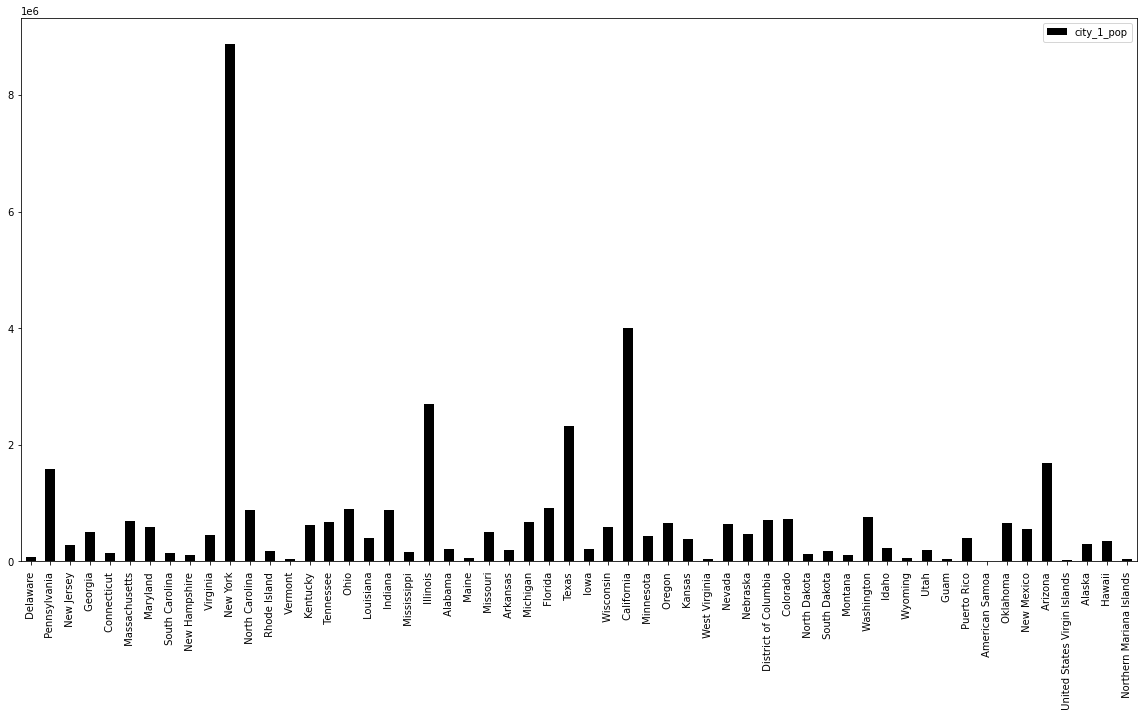

In [35]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
plot = q10[['State','city_1_pop']].plot(kind='bar',color="black",figsize=(20,10))
plot.set_xticklabels(q10['State']);

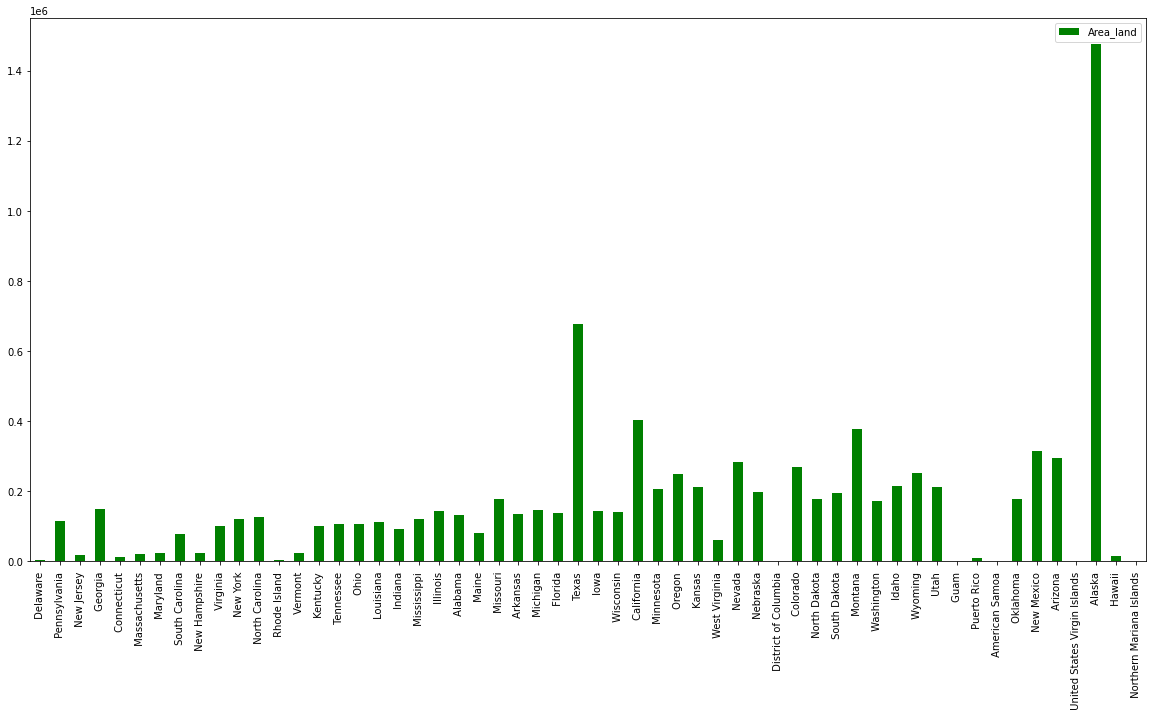

In [36]:
#Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)
plot = q10[['State','Area_land']].plot(kind='bar',color="green",figsize=(20,10))
plot.set_xticklabels(q10['State']);

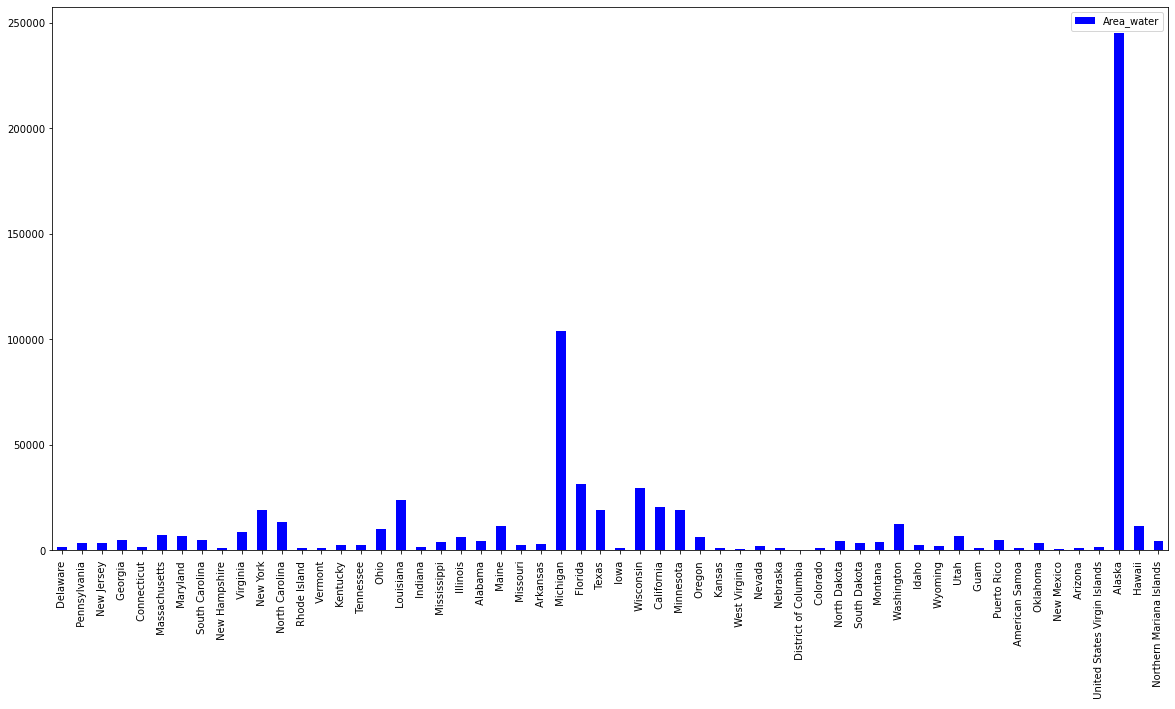

In [37]:
plot = q10[['State','Area_water']].plot(kind='bar',color="blue",figsize=(20,10))
plot.set_xticklabels(q10['State']);